## 1. Introduction 

- Airlines all around the world have been fallen off due to covid-19. 
- A majority of airlines are already bankrupt.Once the covid-19 wave is done, the demand for the air tickets will be huge to visit overseas for hoilday purposes. 
- As airlines point of view,urges to provide competitive discounts and offers to attract the crowd.
- Most importantly, airlines consider critical factors that fulfills customer flight experience with necessary services.

#### 1 A. Company Introduction
- Due to fierce competition in the airline industry, the airline company needs to focus on the passenger’s experience and satisfaction.
- Customer feedback, in particular, is critical since it is an outcome measurement for business performance.
- So, they need to analyze the data of the passenger's travel history.
- One of the key measurements in this process is whether the passenger feels satisfied or not.


##### Current Scenario

- Currently, a manual process to analyze the customer satisfaction based on the number of feedback and complaint mail that are received.

### 2. Problem Statement

The current process suffers from the following problems:
- Analyzing the data of passengers manually and to understand whether a passenger is satisfied or not is a tedious task.
- This process needs to be repeated every time they receive some feedback.

Automate the process of predicting the passenger satisfaction based on the travel history data collected by the airline company.

#### Project Deliverables
- Deliverable: Predict whether the customer is satisfied or not..
- Machine Learning Task: Classification
- Target Variable: satisfaction
  
#### Evaluation Metric
- The model evaluation will be based on the Accuracy score.

In [1]:
# loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Dataset Feature Description

|**Column Name**|**Description**|
|:--|:--
|**Id**|Unique Id|
|**Gender**|Gender of the Passenger|
|**Customer Type**|If the customer is loyal or disloyal|
|**Age**|Age of the customer|
|**Type of Travel**|If the travel is for a business or a personal purpose|
|**Class**|Class of the aircraft in which the customer is travelling|
|**Flight Distance**|Distance covered by the flight|
|**Inflight wifi service**|If there is inflight wifi service or not|
|**Departure/Arrival time convenient**|Rating by the customer for Departure/Arrival Time|
|**Ease of Online booking**|Rating by the customer for this facility|
|**Gate location**|Rating by the customer for this facility|
|**Food and drink**|Rating by the customer for this facility|
|**Online boarding**|Rating by the customer for this facility|
|**Seat comfort**|Rating by the customer for this facility|
|**Inflight entertainment**|Rating by the customer for this facility|
|**On-board service**|Rating by the customer for this facility|
|**Leg room service**|Rating by the customer for this facility|
|**Baggage handling**|Rating by the customer for this facility|
|**Checkin service**|Rating by the customer for this facility|
|**Inflight service**|Rating by the customer for this facility|
|**Cleanliness**|Rating by the customer for this facility|
|**Departure Delay in Minutes**|Rating by the customer for this facility|
|**Arrival Delay in Minutes**|Rating by the customer for this facility|
|**satisfaction**|**If the passenger is satisfied or not**|

In [2]:
#Loading the training dataset
df_train = pd.read_csv(r'C:/Users/INTEL/Downloads/Flight passangers satisfaction prediction/cust_train.csv')
df_train 

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,51032,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,...,5,4,5,3,4,4,5,0,0.0,neutral or dissatisfied
1,54504,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,...,2,2,2,2,3,2,3,47,29.0,neutral or dissatisfied
2,13387,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,...,1,5,5,2,3,2,1,0,0.0,satisfied
3,17388,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,...,5,5,5,5,4,5,5,10,2.0,satisfied
4,91598,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,...,2,4,3,5,3,5,2,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83118,94444,Female,Loyal Customer,52,Business travel,Business,496,1,1,1,...,5,5,5,5,5,5,5,0,1.0,satisfied
83119,68253,Female,Loyal Customer,44,Personal Travel,Eco,432,2,4,2,...,2,2,2,2,5,2,5,0,0.0,neutral or dissatisfied
83120,1373,Male,Loyal Customer,46,Business travel,Business,3492,3,1,1,...,3,3,3,3,2,3,3,0,0.0,neutral or dissatisfied
83121,86180,Female,disloyal Customer,37,Business travel,Business,377,4,4,4,...,2,3,2,5,3,4,2,0,0.0,neutral or dissatisfied


In [3]:
df_test = pd.read_csv(r'C:/Users/INTEL/Downloads/Flight passangers satisfaction prediction/cust_test.csv')
df_test  

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,23509,Male,Loyal Customer,41,Business travel,Eco,303,5,3,3,...,5,5,4,3,3,5,5,5,0,0.0
1,31011,Female,Loyal Customer,18,Business travel,Business,391,1,5,5,...,1,1,4,3,3,1,4,1,17,17.0
2,29345,Female,Loyal Customer,13,Personal Travel,Eco Plus,569,2,4,2,...,1,1,5,4,4,5,5,1,0,0.0
3,50242,Male,disloyal Customer,23,Business travel,Eco,109,1,0,1,...,1,3,2,5,5,3,1,3,0,0.0
4,22244,Male,Loyal Customer,23,Personal Travel,Business,83,4,5,0,...,5,5,3,5,4,3,5,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20776,21910,Male,disloyal Customer,26,Business travel,Eco,448,4,0,4,...,1,3,4,2,2,3,3,3,0,0.0
20777,107869,Male,disloyal Customer,43,Business travel,Business,228,2,2,2,...,4,4,1,3,3,2,3,4,21,6.0
20778,44306,Female,Loyal Customer,38,Business travel,Business,1428,3,1,3,...,2,4,4,5,4,3,4,4,0,5.0
20779,16965,Male,Loyal Customer,53,Business travel,Eco,195,2,1,1,...,2,2,3,1,3,3,4,2,0,0.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

Numerical data - 19
Categorical data - 5 

In [5]:
df_train.shape

(83123, 24)

Rows - 83123, Columns - 24

In [6]:
# Checking missing values 
df_train.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             251
satisfaction                           0
dtype: int64

In [7]:
#Handling missing values
df_train['Arrival Delay in Minutes'].mean()

15.063121440293465

In [8]:
df_train['Arrival Delay in Minutes'].fillna('mean', inplace=True)

###### Pre profiling

In [9]:
#import pandas as pd
#import sweetviz 

#df_train = pd.read_csv(r'C:/Users/INTEL/Downloads/cust_train.csv')

#df_test = pd.read_csv(r'C:/Users/INTEL/Downloads/cust_test.csv')


In [10]:
#my_report_flight = sweetviz.analyze([df_train, "Train"])

In [11]:
#my_report_flight.show_html('Flight.html')

In [12]:
df_train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000
mean,64971.539574,39.351106,1190.686753,2.732553,3.062269,2.756385,2.978057,3.205286,3.252842,3.442790,3.362992,3.383636,3.351407,3.634313,3.308194,3.643865,3.291351,14.714556
std,37465.886717,15.099487,998.640016,1.329950,1.526983,1.401047,1.279064,1.330482,1.350905,1.318317,1.331880,1.287778,1.313365,1.178930,1.264747,1.173351,1.313560,38.108874
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32552.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,64864.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,97430.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000


###### Converting catagorical values into numeric

In [13]:
df_train['Gender'].value_counts()

Female    42117
Male      41006
Name: Gender, dtype: int64

In [14]:
df_train['Customer Type'].value_counts()

Loyal Customer       67915
disloyal Customer    15208
Name: Customer Type, dtype: int64

In [15]:
df_train['Type of Travel'].value_counts()

Business travel    57310
Personal Travel    25813
Name: Type of Travel, dtype: int64

In [16]:
df_train['Class'].value_counts()

Business    39691
Eco         37457
Eco Plus     5975
Name: Class, dtype: int64

In [17]:
df_train['satisfaction'].value_counts()

neutral or dissatisfied    47004
satisfied                  36119
Name: satisfaction, dtype: int64

In [18]:
df_train_copy = df_train.copy()

In [19]:
new_data = {'Gender':{'Male': 0, 'Female': 1},
           'Customer Type':{'disloyal Customer':0, 'Loyal Customer':1},
           'Type of Travel':{'Business travel':0, 'Personal Travel':1},
           'Class':{'Business':0,'Eco':1,'Eco Plus':2}, 
           'satisfaction':{'neutral or dissatisfied':0,'satisfied':1}}


In [20]:
df_train_copy = df_train.copy()
df_train_copy.replace(new_data, inplace=True)

In [21]:
df_train_copy.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,51032,1,1,30,1,1,193,3,4,0,...,5,4,5,3,4,4,5,0,0,0
1,54504,1,1,51,0,1,925,2,1,1,...,2,2,2,2,3,2,3,47,29,0
2,13387,0,0,27,0,1,505,0,0,0,...,1,5,5,2,3,2,1,0,0,1
3,17388,1,1,52,0,0,2953,2,2,2,...,5,5,5,5,4,5,5,10,2,1
4,91598,1,0,15,0,1,1352,4,4,4,...,2,4,3,5,3,5,2,0,0,1


In [22]:
df_train_copy.describe()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,...,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000
mean,64971.539574,0.506683,0.817042,39.351106,0.310540,0.594384,1190.686753,2.732553,3.062269,2.756385,...,3.442790,3.362992,3.383636,3.351407,3.634313,3.308194,3.643865,3.291351,14.714556,0.434525
std,37465.886717,0.499958,0.386634,15.099487,0.462717,0.620370,998.640016,1.329950,1.526983,1.401047,...,1.318317,1.331880,1.287778,1.313365,1.178930,1.264747,1.173351,1.313560,38.108874,0.495697
min,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32552.500000,0.000000,1.000000,27.000000,0.000000,0.000000,413.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64864.000000,1.000000,1.000000,40.000000,0.000000,1.000000,844.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97430.500000,1.000000,1.000000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,1.000000
max,129880.000000,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1.000000


#### Checking correlation between dependent and independent varibles 

In [23]:
x= df_train_copy.corr()
x

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
id,1.000000,0.002376,0.003634,0.021483,0.001561,-0.106455,0.098691,-0.022172,-0.000553,0.014611,...,0.053329,0.002608,0.055520,0.042841,0.075158,0.076630,0.078126,0.025262,-0.019820,0.013435
Gender,0.002376,1.000000,-0.031204,-0.009301,-0.008373,0.010912,-0.004923,-0.007091,-0.008866,-0.005181,...,0.026321,-0.006073,-0.007374,-0.031077,-0.035502,-0.010868,-0.037031,-0.007435,-0.001755,-0.011790
Customer Type,0.003634,-0.031204,1.000000,0.280255,0.309043,-0.041912,0.226354,0.004391,0.202348,0.014927,...,0.157595,0.108878,0.055099,0.045446,-0.028224,0.027555,-0.024374,0.082764,-0.006498,0.186386
Age,0.021483,-0.009301,0.280255,1.000000,-0.049694,-0.116266,0.100124,0.015985,0.037954,0.024568,...,0.159514,0.075221,0.058371,0.042507,-0.047916,0.032107,-0.048074,0.052049,-0.010732,0.136977
Type of Travel,0.001561,-0.008373,0.309043,-0.049694,1.000000,0.487294,-0.267598,-0.106024,0.259653,-0.134904,...,-0.123532,-0.146465,-0.055982,-0.138096,-0.028946,0.020384,-0.020897,-0.079008,-0.007026,-0.449418
Class,-0.106455,0.010912,-0.041912,-0.116266,0.487294,1.000000,-0.429575,-0.022007,0.091699,-0.093536,...,-0.206630,-0.175427,-0.207456,-0.195081,-0.164352,-0.155660,-0.157514,-0.124688,0.009472,-0.448042
Flight Distance,0.098691,-0.004923,0.226354,0.100124,-0.267598,-0.429575,1.000000,0.008168,-0.021642,0.065762,...,0.158617,0.129424,0.110198,0.132303,0.062639,0.071191,0.055933,0.094402,0.003135,0.301113
Inflight wifi service,-0.022172,-0.007091,0.004391,0.015985,-0.106024,-0.022007,0.008168,1.000000,0.345815,0.716820,...,0.120125,0.205673,0.120613,0.158338,0.119624,0.040306,0.108901,0.130169,-0.017817,0.284496
Departure/Arrival time convenient,-0.000553,-0.008866,0.202348,0.037954,0.259653,0.091699,-0.021642,0.345815,1.000000,0.438179,...,0.011039,-0.005021,0.067079,0.011074,0.073657,0.093595,0.074568,0.015097,-0.002000,-0.052563
Ease of Online booking,0.014611,-0.005181,0.014927,0.024568,-0.134904,-0.093536,0.065762,0.716820,0.438179,1.000000,...,0.030200,0.045708,0.037738,0.105184,0.039010,0.009301,0.035261,0.016322,-0.007941,0.173212


###### The Pearson correlation coefficient measures the linear association between variables. Value can be interpreted like so:
|**Values**|**Description**|
|:--|:--|
|+1|Complete positive correlation|
|+0.8|Strong positive correlation|
|+0.6|Moderate positive correlation|
|0|No correlation whatsoever|
|-0.6|Moderate negative correlation|
|-0.8|Strong negative correlation|
|-1|Complete negative correlation|

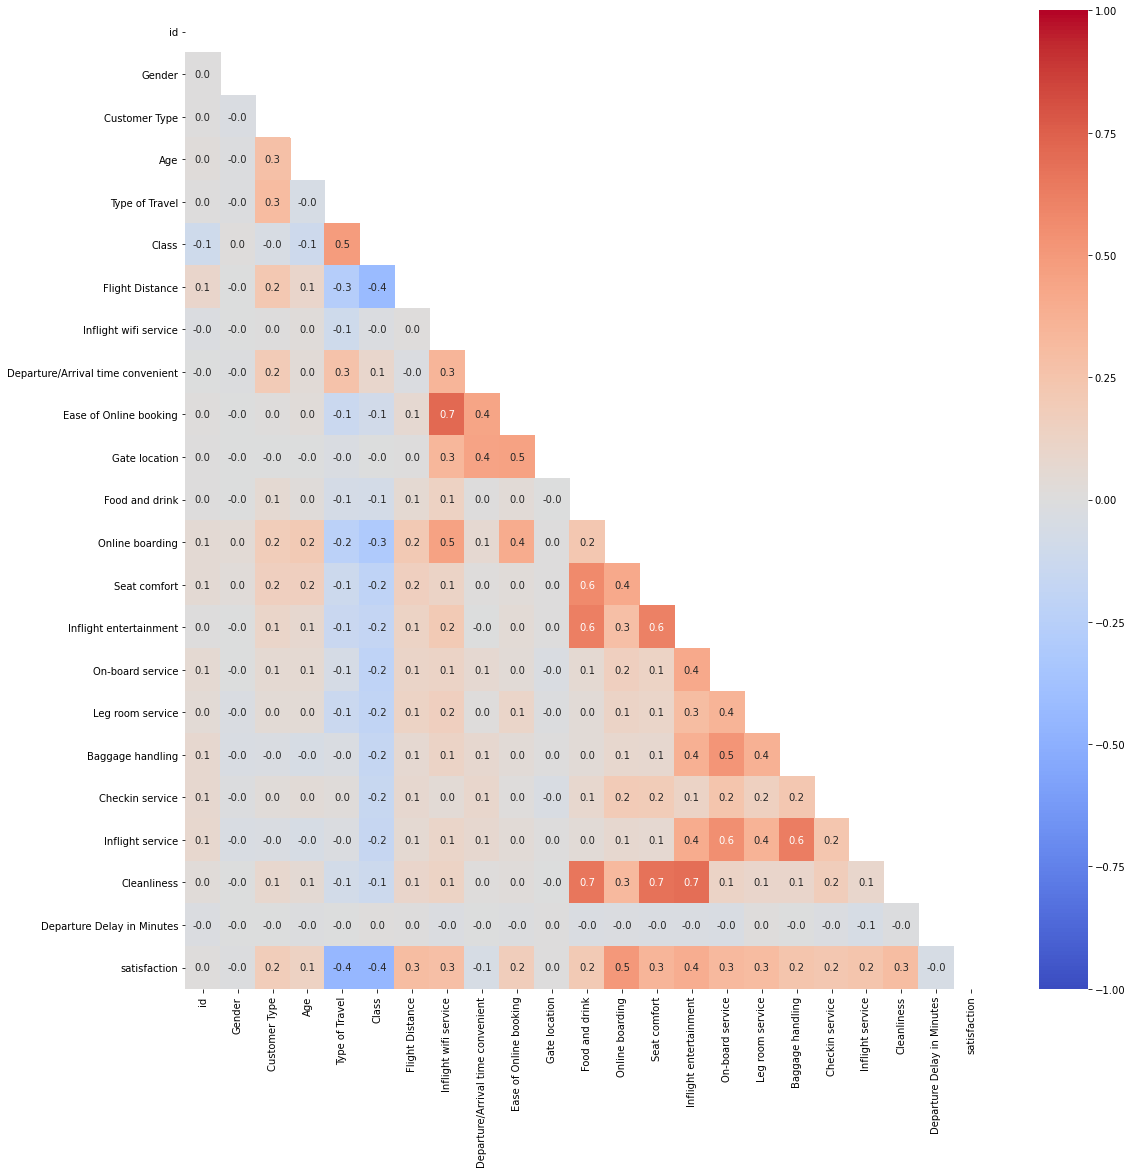

In [25]:
import seaborn as sns
plt.figure(figsize=(18,18))
matrix = np.triu(df_train_copy.corr())
sns.heatmap(df_train_copy.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)

- Food and drink, Cleanliness, Seat comfort, Inflight entertainment, and Ease of booking is most strongly correlated with passenger satisfication (0.7)
- Inflight service, On-board service, Baggage handling is moderate positively correlated with satisfication variable (0.6)
- Class and Type of travel are negatively correlated with satisfication variable (-0.4)

#### EDA 

###### 1. Age 

##### A. What's age distribution of the air passengers?

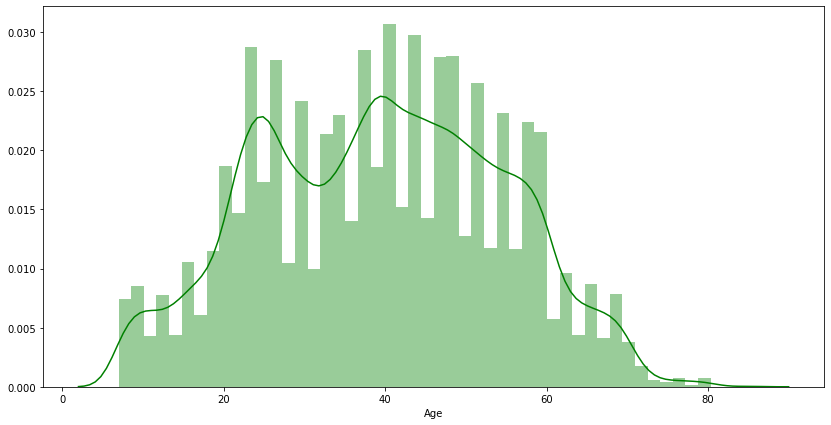

In [26]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['Age'], color='g')

- A majority of Passengers' age is between mid-age (20+ and 35+)

##### B. What's the maximum age of the passenger?

In [27]:
df_train['Age'].max()

85

##### C. What's the minimum age of the passenger?

In [28]:
df_train['Age'].min()

7

###### 2. Gender

##### A. What's the gender ratio of the passengers?

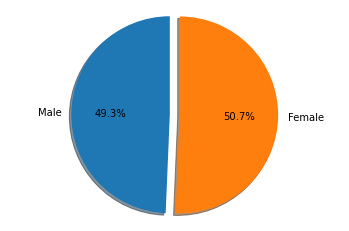

In [29]:
import matplotlib.pyplot as plt

labels = 'Male', 'Female'
sizes = [41006,42117]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

- The gender ratio of Female 42,117(51%) and Male 41,006(49%)

##### 3. What's the Customer Type ratio?

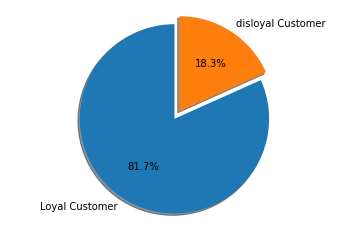

In [30]:
import matplotlib.pyplot as plt

labels = 'Loyal Customer', 'disloyal Customer'
sizes = [67915,15208]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

- Ratio of Loyal customers (82%) are more than disloyal customers (18%)

##### 4. How many types of travelers are there? 

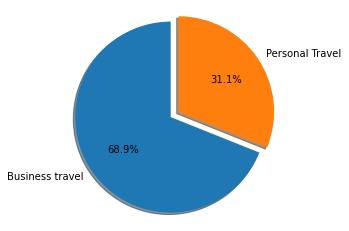

In [31]:
import matplotlib.pyplot as plt

labels = 'Business travel', 'Personal Travel'
sizes = [57310,25813]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

- The ratio of Business purpose travelers are (69%) and Personal purpose travelers are (31%)

##### 5. How many classes are there in the airline?

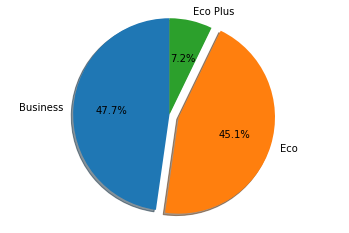

In [33]:
import matplotlib.pyplot as plt

labels = 'Business', 'Eco', 'Eco Plus'
sizes = [39691,37457,5975]
explode = (0, 0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

- The classes are divided into 3 and Business class (48%) are more in numbers when compared to Eco (45%) and Eco Plus (7%)

##### 6. How many people are happy with the air services?

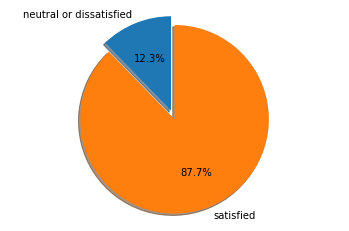

In [34]:
import matplotlib.pyplot as plt

labels = 'neutral or dissatisfied', 'satisfied'
sizes = [47004,336119]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

- Nearly 88% air passengers are happy with the services provided by the airlines.
- While rest of 12% are unhappy with the inflight services.

- Food and drink, Cleanliness, Seat comfort, Inflight entertainment, and Ease of booking is most strongly correlated with passenger satisfication (0.7)
- Inflight service, On-board service, Baggage handling is moderate positively correlated with satisfication variable (0.6)
- Class and Type of travel are negatively correlated with satisfication variable (-0.4)

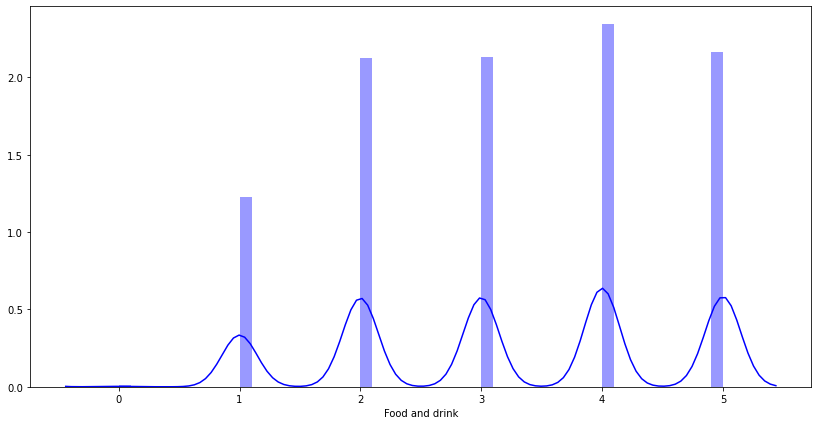

In [37]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['Food and drink'], color='b')

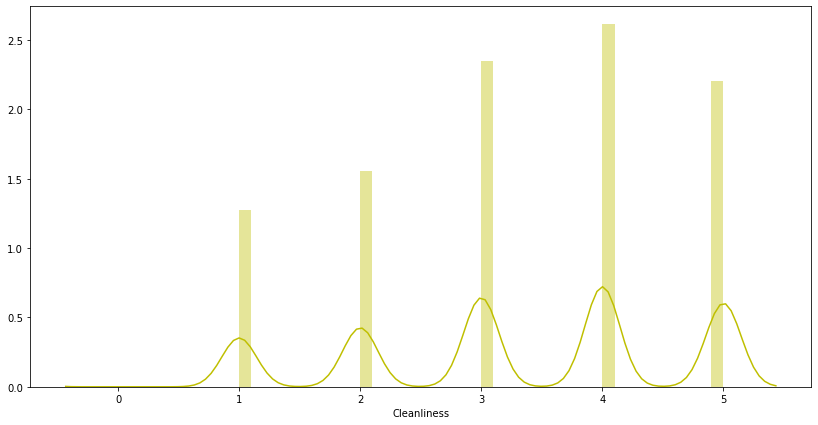

In [38]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['Cleanliness'], color='y')

###### Overall hygiene rating which is scored out of 5 as follows:

- 0 = Urgent Improvement Needed.
- 1 = Major Improvement Needed.
- 2 = Some Improvement Needed.
- 3 = Satisfactory.
- 4 = Good.
- 5 = Very Good.

- Cleanliness and Food and drink variables are strongly correlated with passenger satisfication and both the variables have moderately 4-star ratings. 

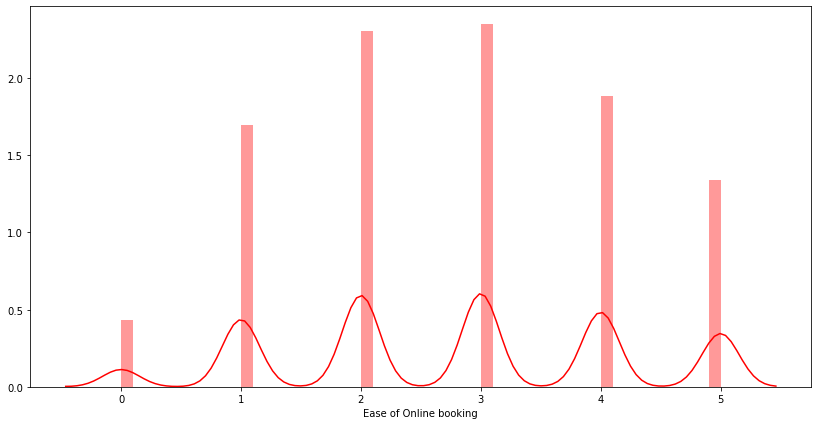

In [39]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['Ease of Online booking'], color='r')

- The overall rating for Ease of online booking which is convient way of buying air tickets is 3-star, which is strongly correlated with passenger satisfication 

### Overall Analysis:

#### Here are a few things to make air passenger happy with the services

**Entertainment** – Passengers look for in-flight entertainment options, such as streaming TV. 

**Comfort–seat** - Comfort rarely seems to improve on planes; it is one of the more frequent passenger complaints. 

**Cleanliness** – While airlines have cut expenses every way possible, one unacceptable cutback for many companies has been cabin cleanliness. 

**Efficiency** – Travellers want service efficiency in every aspect of their air travel. Some airlines now offer social media-based customer services that assist travellers in re-booking flights, or making other flight-related changes.

**Meals** – Many airlines have reduced or eliminated food services; others have stepped up to provide greater meals quality through more sophisticated menus and healthier food choices. 

**Wi-Fi** – Highest on many passengers’ wish list is reliable, uninterrupted Wi-Fi service.

**Courtesy**– Few things go farther toward creating a positive flying experience than when passengers are treated with courtesy, respect, and a smile. 

Customer satisfaction scores are consistently higher when airline staff greet each passenger with a smile and a “Have a good flight.”
